<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/expts_with_mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Last amended 26th Feb, 2021
#Myfolder: github/harnalashok/deeplearning/
#Ref: 
#  Data source: https://www.kaggle.com/alxmamaev/flowers-recognition
#               https://albumentations-demo.herokuapp.com/
#               https://albumentations.ai/
#               https://colab.research.google.com/drive/1odAHwbxAoJV1NzRQFYHeoHWsvdQKwPqV?authuser=2#scrollTo=esN9bSG0FpVv
#
# Objectives:
#               i) Using mobilenet
#              ii) Using mobilenet on browser
#             iii) Using Image Augmentaion techniques
#                  from libraries other than tensorflow/keras
#              iv) Transfer learning using Mobilenet

# More references
# Depth wise Separable Convolutional Neural Networks
#   https://www.geeksforgeeks.org/depth-wise-separable-convolutional-neural-networks/
# A Basic Introduction to Separable Convolutions
#   https://towardsdatascience.com/a-basic-introduction-to-separable-convolutions-b99ec3102728


# Using mobilenet in the browser
mobilenet is so light-weight that it can be loaded and used in the browser to make predictions. Please refer this link on [github](https://gist.github.com/mipra282). Here are the steps.  

1. Install webserver
2. Create a file in notepad as, `index.html`, as at this [link](https://medium.com/analytics-vidhya/image-classification-using-mobilenet-in-the-browser-b69f2f57abf). Script is also reproduced below on this page.
3. Create a file in notepad, as `index.js` as at this [link](https://medium.com/analytics-vidhya/image-classification-using-mobilenet-in-the-browser-b69f2f57abf). Script is also reproduced below on this page.
4. Create a folder by name of '`image`'
5. In this folder (just) place one jpg image, say, of some dog.
6. Keep all three objects (two files + one folder) under another folder, say, `mobilenet`. 
7. Move the `mobilenet` folder to within webserver-root.
8. Access the site now as: `http://127.0.0.1/mobilenet`
9. You should see the image of dog on the web-page. Click the button `Predict` to make predictions about the image.  

#### Interactive experience
For a more interactive experience, ie capturing any image through webcam and classifying it through browser see this easy [link](https://codelabs.developers.google.com/codelabs/tensorflowjs-teachablemachine-codelab#0).

#### Install IIS on Windows 10

Here are the steps to install a webserver on Windows 10.
1. Go to Control Panel
2. Click Programs
3. Click Programs and Features
4. On the left panel, Click
	Turn Windows features on or off
	Search for Internet Informatin Services
	Check it and Click OK. IIS will be installed.
	Done.

5. You can now access the site: http://127.0.0.1

6. The webserver root folder will be at: C:\inetpub\wwwroot.
(To uninstall the webserver, follow reverse process. That is, Uncheck at Step 4, and Click OK. 

### Script files for browser oriented classification

#### index.html

In [ ]:
<!DOCTYPE html>
<html>
  <head>
    <!-- Load the latest version of TensorFlow.js.You can include the CDN links -->
    <script src="https://unpkg.com/@tensorflow/tfjs"></script>
    <script src="https://unpkg.com/@tensorflow-models/mobilenet"></script>
  </head>
  <body>
    <div id="console"></div>
    <!-- Add an image that is used to test -->
    <img id="img" crossorigin src="image/dog.jpg" width="227" height="227" />

    <button onclick="app();">Predict</button>
    <div class="classify"><h1></h1></div>

    <script src="index.js"></script>
  </body>
</html>

</body>
</html>

#### index.js

In [ ]:
async function app(input) {
  prediction = document.querySelector(".classify h1");
  prediction.innerHTML = "Predicting...";
  console.log("Loading mobilenet..");

  // Load the model.
  net = await mobilenet.load();
  console.log("Successfully loaded model");

  // Make a prediction through the model on our image.
  const imgEl = document.getElementById("img");

  const result = await net.classify(imgEl);
  console.log(result);
  console.log(result[0].className);
  prediction = document.querySelector(".classify h1");

  prediction.innerHTML = result[0].className;
}


#Mobilenet for classification

#### Downloading data from Kaggle

In [1]:
#1.0 Import libraries
import keras
keras.__version__
import numpy as np

In [ ]:
# 1.1 Install kaggle
!pip install kaggle
! ls -la /content

In [3]:
# 1.2 Delete existing folders
! rm -rf /content/flowers
! rm -rf $HOME/.kaggle

In [4]:
# 1.3 Next upload the downloaded Kaggle's json file
#     to Colab

from google.colab import files

# 1.4 This command will create a Browse button
#      to browse and select a file from your machine
uploaded = files.upload()

# 1.5 Get details of uploaded files
#     File get uploaded to /content folder

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [9]:
# 2.0 Secure your kaggle.json file
!mkdir $HOME/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [10]:
# 2.1 Move kaggle.json to approrpiate folder
!mv kaggle.json $HOME/.kaggle/kaggle.json
!chmod 600 $HOME/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [11]:
# 2.2 Before unzipping
#      delete any existing folders
! rm -rf /content/data
! rm -rf /content/flowers

In [ ]:
# 2.3 Download data from Kaggle
#     https://www.kaggle.com/alxmamaev/flowers-recognition

! kaggle datasets download -d alxmamaev/flowers-recognition

In [ ]:
# 2.4 Unzip in /content folder

!unzip \*.zip  && rm *.zip

#### Transfering downloaded files to train/validation folders

In [14]:
# 3.0 Check unzipped files
#     Should be: daisy  dandelion  flowers  rose  sunflower  tulip
! ls /content/flowers/

daisy  dandelion  flowers  rose  sunflower  tulip


In [15]:
# 3.1 Create train/test folders
!mkdir -p /content/data/train
!mkdir -p /content/data/validation

In [16]:
# 3.2 Move folders/files
! mv /content/flowers/flowers/*  /content/data/validation
! rm -rf /content/flowers/flowers
! mv /content/flowers/*  /content/data/train

In [17]:
# 3.3 Check
! ls /content/data/validation
! ls /content/data/train

daisy  dandelion  rose	sunflower  tulip
daisy  dandelion  rose	sunflower  tulip


In [18]:
# 4.0 Get number of image files in various folders
#     one-by-one
#     https://stackoverflow.com/a/8311376/3282777
import os
path, dirs, files = next(os.walk("/content/data/train/daisy/"))
file_count = len(files)
file_count

769

In [19]:
# 4.1 Here is the accounting:

# "/content/flowers/daisy" :      769
# "/content/flowers/dandelion" : 1055
# "/content/flowers/rose"  :      784
# "/content/flowers/sunflower" :  734
# "/content/flowers/tulip":       984
# Same as above under: /content/flowers/flowers/

In [20]:
# 4.2 Here are our five train folders:

daisy_folder      = "/content/data/train/daisy"
dandelion_folder  = "/content/data/train/dandelion"
rose_folder       = "/content/data/train/rose" 
sunflower_folder  = "/content/data/train/sunflower"
tulip_folder      = "/content/data/train/tulip"

#### Read images from disk

In [21]:
# 5.0 Import libraries
#     to read images from disk
#     and see images

import os
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [22]:
# 5.1 Show all command outputs from a cell:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [23]:
# 5.2 Load images from disk

# 5.2.1
folders = [daisy_folder,dandelion_folder,rose_folder,sunflower_folder,tulip_folder]
y_train = []
# 5.2.2
def load_images_from_folder(folder):
  images = []
  for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))
    if img is not None:
      images.append(img)
  return images   

In [24]:
# 5.2.3 Read all images from disk
#       Takes time
all_images = [ load_images_from_folder(i)   for i in folders ]

In [25]:
# 5.2.4 Check
daisy = all_images[0]
dandelion = all_images[1]
rose = all_images[2]
sunflower = all_images[3]
tulip = all_images[4]


In [ ]:
# 5.2.5 Check
print("\n----daisy-----\n")
len(daisy)          # 769
print("\n")
daisy[0].shape      # (180, 240, 3)
print("\n----dandelion-----\n")
len(dandelion)      # 1052
print("\n")
dandelion[0].shape  # (336, 500, 3)
print("\n----rose-----\n")
len(rose)           # 784
print("\n")
rose[0].shape       # (213, 320, 3)
print("\n----sunflower-----\n")
len(sunflower)      # 734
print("\n")
sunflower[0].shape  # (240, 320, 3)
print("\n----tulip-----\n")
len(tulip)          # 984
print("\n")
tulip[0].shape      # (227, 320, 3)

#5.2.6 Here are labels for images
y_train = [0] * len(daisy) + [1] * len(dandelion) + [2] * len(rose) + [3] * len(sunflower) + [4] * len(tulip)
print("\n")
len(y_train)  # 4323

#### Display images at random

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


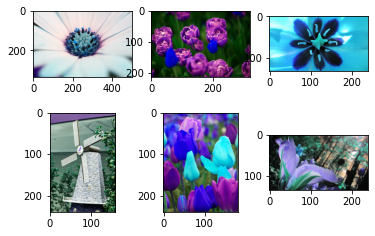

In [27]:
# 6.0 Now make a random select
flower = np.random.choice([daisy,dandelion,rose,sunflower,tulip ])

#6.1

# 6.1.1 Get a sample of six images
sample = np.random.choice(range(len(flower)), size  = 6)

# 6.1.2 Now display them
fig = plt.figure()
j = 0
for i in sample:
  j += 1
  ax = fig.add_subplot(2,3,j)
  abc =imshow(flower[i])
  if j > 6:
    break

### Start classification

#### Install/Call libraries and define constants

In [ ]:
# 7.0 Install an image augmentation library.
! pip install -U albumentations

In [51]:
# 7.1 Call all libraries
import tensorflow as tf
import pandas as pd
#import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.applications import MobileNet as mb
from tensorflow.keras.models import Sequential
import albumentations as A
import cv2  # We have already imported it before

In [30]:
# 7.2 Our constants
img_width, img_ht = 224,224
batch_size = 32

### Our base NN model
Use mobilenet

In [136]:
# 8
# 8.1 Delete any earlier model(s)
#     if they exist

# 8.1.1
if 'model' in locals():
  print("1.Deleting NN model")
  del model

# 8.1.2
if 's_model' in locals():
  print("2.Deleting NN s_model")
  del s_model

# 8.1.3
if 'model_feature_extractor' in locals():
  print("3.Deleting feature-extractor model")
  del model_feature_extractor

1.Deleting NN model
2.Deleting NN s_model
3.Deleting feature-extractor model


In [137]:
# 8.2 Download mobilenet model from
#     the Internet. Instantiate keras 
#     MobileNet class and create this
#     model. 

model = tf.keras.applications.MobileNet(
                                        input_shape=(img_width, img_ht,3),
                                        alpha=1.0,
                                        depth_multiplier=1,
                                        dropout=0.001,
                                        include_top=True,
                                        weights='imagenet',
                                        input_tensor=None,
                                        pooling=None,
                                        classes=1000,
                                        classifier_activation='softmax'
                                        )

In [146]:
# 8.3 Look at model summary
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [148]:
# 8.3 We will confine our model from 'InputLayer'
#     to 'reshape_2' layer. This model will extract
#     all features available at 'reshape_2'

#filters = model.get_layer("reshape_2").output # TensorShape([None, 1000])
filters = model.get_layer("global_average_pooling2d_6").output # TensorShape([None, 1000])
model_feature_extractor = tf.keras.Model(model.input, filters)

### Image augmentation [pipeline](https://albumentations.ai/docs/getting_started/image_augmentation/)

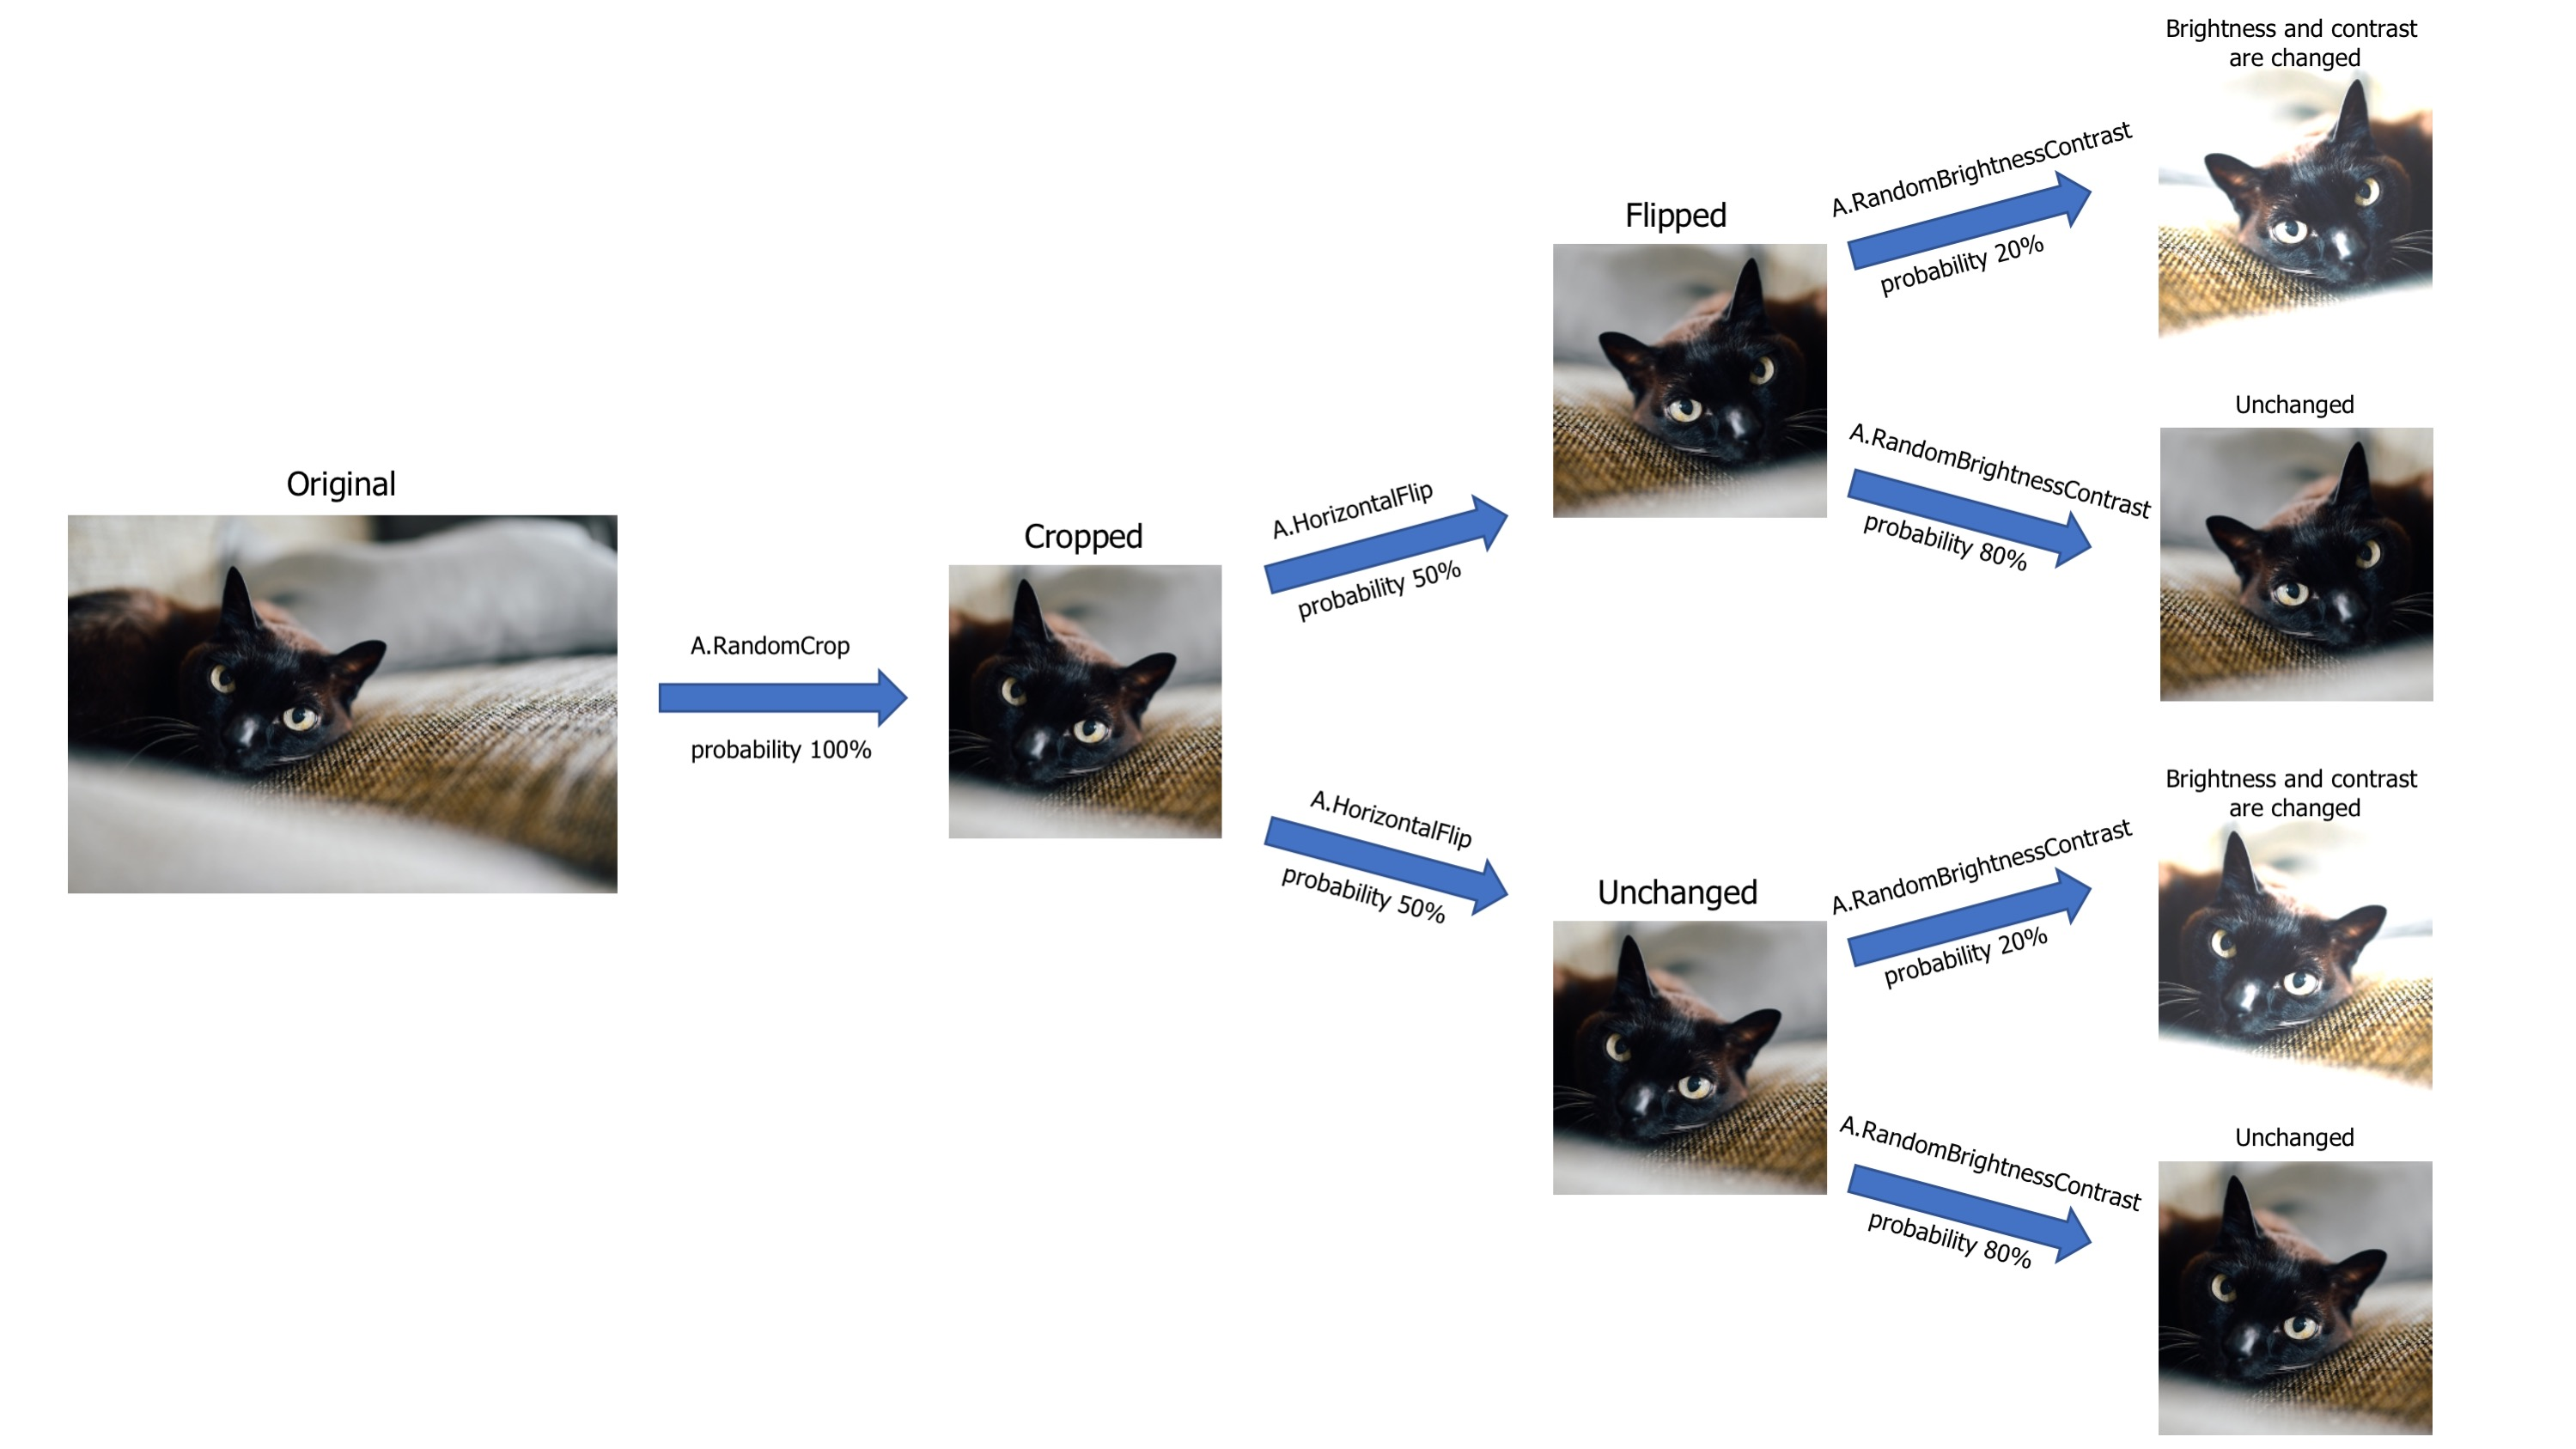

In [149]:
# 9.0 Declare an augmentation pipeline
#     See: https://albumentations.ai/docs/examples/example/

transform = A.Compose(
                       [
                          #A.RandomCrop(width=256, height=256),
                           A.HorizontalFlip(p=0.5),
                           A.RandomBrightnessContrast(p=0.2),
                           A.Blur(always_apply=False, p=1.0, blur_limit=(3, 7)),
                           A.Cutout(always_apply=False, p=1.0, num_holes=8, max_h_size=8, max_w_size=8),
                           A.RandomRotate90(),
                           A.Transpose(),
                           A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
                           A.OpticalDistortion(),
                           A.GridDistortion(),
                           A.HueSaturationValue(),
                       ]
                      )

# 9.1 Embed the pipeline inside a function
#     We will use this function inside 
#     Keras ImageDataGenerator 

def img_transform(img):
  transformed = transform(image=img)
  return transformed["image"]
  

In [150]:
# 9.2 Instantiate ImageDataGenerator class 
#     for train data
datagen = ImageDataGenerator(
                             rescale = 1/255,
                             vertical_flip=True,
                             preprocessing_function = img_transform
                             )                  
    


In [151]:
# 9.3 ImageDataGenerator object for validation images
valid_datagen = ImageDataGenerator(
                                    rescale = 1/255
                                   )

In [152]:
# 10.0 Iterator to get images from directory
train_gen = datagen.flow_from_directory(
                                        "/content/data/train",
                                        target_size=(224,224), # as required by mobilenet
                                        batch_size = 32
                                        )

10.1 
valid_gen = valid_datagen.flow_from_directory(
                                               "/content/data/validation",
                                               target_size=(224,224)
                                              )
 

Found 4323 images belonging to 5 classes.


10.1

Found 4323 images belonging to 5 classes.


In [157]:
# 10.1.1 Just enquiring shapes of Image Generator outputs
x,y = next(train_gen)
x.shape   # (32, 224, 224, 3)
print("\n")
y[:4]     # So y is in OHE format
          # We have to use 'categorical_crossentropy

(32, 224, 224, 3)

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

### Neural network model
Classification layer


In [153]:
# 11.0
s_model=Sequential()

# 11.1 Add mobilenet base model first 
s_model.add(model_feature_extractor)

# 11.2 Then add classification layer
s_model.add(Dense(512, activation='relu'))
s_model.add(Dropout(0.5))
s_model.add(Dense(5, activation='softmax'))

In [154]:
# 11.3 Compile model
#      As our target is OHE, we use categorical_crossentropy
#      If target is of the form: [0,1,2,3,4] then use 
#      sparse_categorical_crossentropy
#      Ref: https://datascience.stackexchange.com/a/55987/64849

s_model.compile(
                loss = "categorical_crossentropy",
                metrics = "accuracy"
                )

In [155]:
# 11.4 Start training
epoch = 30
history = s_model.fit(
                      train_gen,
                      validation_data= valid_gen,
                      epochs = epoch
                      )

'\nfit_generator(\n    generator, steps_per_epoch=None, epochs=1, verbose=1, callbacks=None,\n    validation_data=None, validation_steps=None, validation_freq=1,\n    class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False,\n    shuffle=True, initial_epoch=0\n)\n'

Epoch 1/30
136/136 [==============================] - 57s 389ms/step - loss: 2.4138 - accuracy: 0.2832 - val_loss: 3.5999 - val_accuracy: 0.4490
Epoch 2/30
136/136 [==============================] - 53s 391ms/step - loss: 1.4380 - accuracy: 0.3615 - val_loss: 3.0861 - val_accuracy: 0.3810
Epoch 3/30
136/136 [==============================] - 53s 389ms/step - loss: 1.3870 - accuracy: 0.3889 - val_loss: 1.0275 - val_accuracy: 0.6544
Epoch 4/30
136/136 [==============================] - 53s 386ms/step - loss: 1.2931 - accuracy: 0.4351 - val_loss: 0.7855 - val_accuracy: 0.7083
Epoch 5/30
136/136 [==============================] - 52s 385ms/step - loss: 1.3012 - accuracy: 0.4249 - val_loss: 2.4958 - val_accuracy: 0.3676
Epoch 6/30
136/136 [==============================] - 52s 379ms/step - loss: 1.2753 - accuracy: 0.4492 - val_loss: 0.6289 - val_accuracy: 0.7870
Epoch 7/30
136/136 [==============================] - 52s 384ms/step - loss: 1.2873 - accuracy: 0.4307 - val_loss: 1.0500 - val_ac

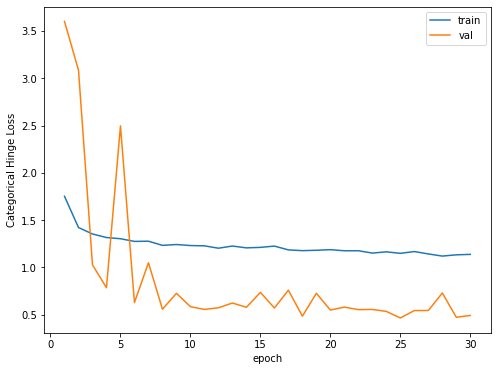

In [160]:
#12.0 Quick plot of losses
import seaborn as sns
e = np.linspace(1, epoch, epoch)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
sns.lineplot(x = e, y = history.history["loss"],
             ax=axes, label="train");
sns.lineplot(x = e, y = history.history["val_loss"],
             ax=axes, label="val");
axes.set_ylabel("Loss")
axes.set_xlabel("epoch");

In [ ]:
#### I am done ##########